In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

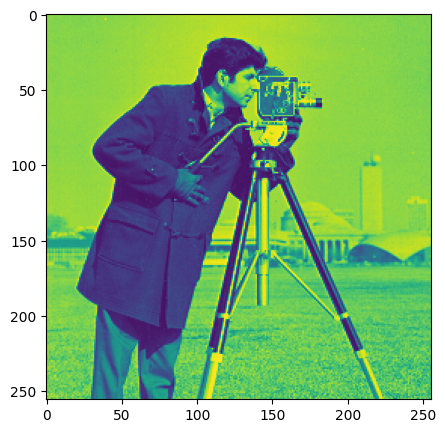

In [59]:
img = Image.open('./cameraman.pgm')
plt.figure(figsize=(9,5))
plt.imshow(img);

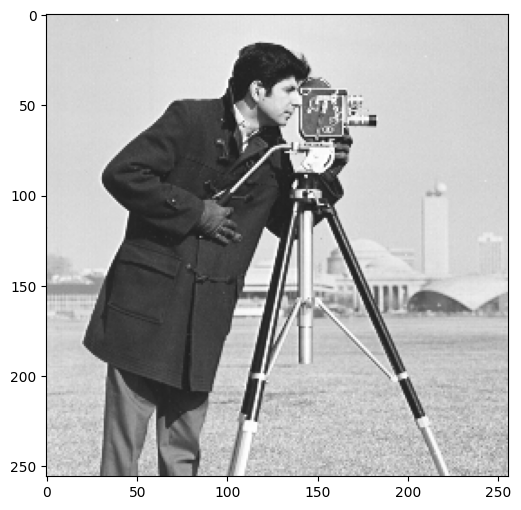

In [60]:
imggray = img.convert('LA')
plt.figure(figsize=(9,6))
plt.imshow(imggray);

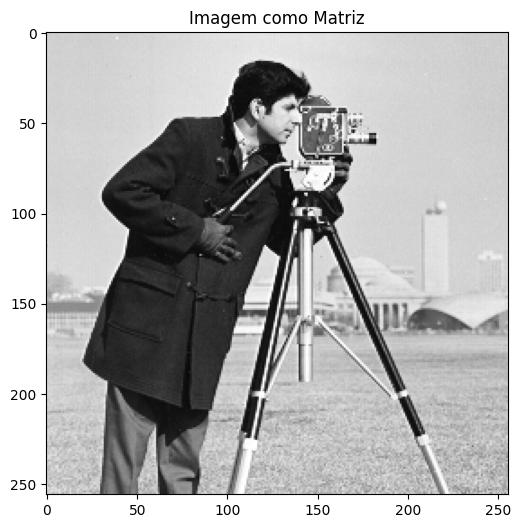

In [69]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray')
plt.title("Imagem como Matriz")
plt.show()


In [71]:
imgmat.shape

(256, 256)

In [70]:
# Decomposição SVD
U, sigma, V = np.linalg.svd(imgmat)
U.shape, sigma.shape, V.shape

((256, 256), (256,), (256, 256))

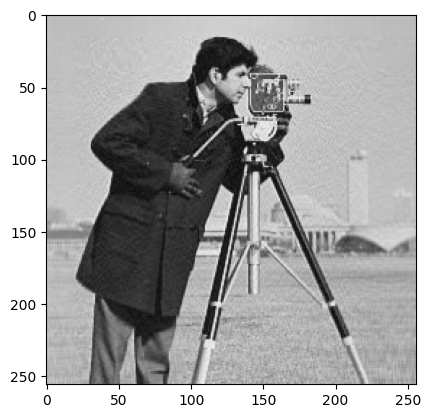

In [ ]:
# Quantização: escolher o número de níveis para quantização
quantization_levels = 16  # O número de níveis para quantização (ajuste conforme necessário)

# Função de quantização
def quantize(sigma, levels):
    min_val, max_val = sigma.min(), sigma.max()
    step = (max_val - min_val) / (levels - 1)
    
    # Quantizando os valores de sigma
    quantized_sigma = np.round((sigma - min_val) / step) * step + min_val
    return quantized_sigma

# Quantizando os coeficientes sigma
quantized_sigma = quantize(sigma, quantization_levels)

# Número de termos a ser usado na reconstrução
term_number = 75

# Reconstituir a imagem com coeficientes quantizados
reconstimg = np.matrix(U[:, :term_number]) * np.diag(quantized_sigma[:term_number]) * np.matrix(V[:term_number, :])

# Exibir a imagem reconstruída com SVD + Quantização
plt.imshow(reconstimg, cmap='gray')
plt.title("Imagem Reconstruída com SVD + Quantização")
plt.show()